# Compute average energies from Tensorboard logs

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

## Load Tensorboard logs

In [2]:
def find_events(version):
    pathdir = f'results/ising/version_{version}/'
    folder_content = os.listdir(pathdir)
    regex_pattern = 'events.out*'
    regex = re.compile(regex_pattern)
 
    # Search in folder content
    res = ''
    for path in folder_content:
        if regex.search(path):
            res = path
            break
 
    return pathdir + res

In [3]:
versions = ['discrete', 'continuous', 'terminal']
paths = [find_events(version) for version in versions]
eas = [event_accumulator.EventAccumulator(path) for path in paths]
for ea in eas:
    ea.Reload()

In [4]:
eas[0].Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['loss',
  'check_loss',
  'E',
  'epoch',
  'val_energy',
  'val_energy_magn',
  'prob_accept'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

## Plot and compute average energies

In [5]:
energies = [np.array(ea.Scalars('val_energy')) for ea in eas]

-1.0631544017791748
-1.062683711051941
-1.0622316551208497


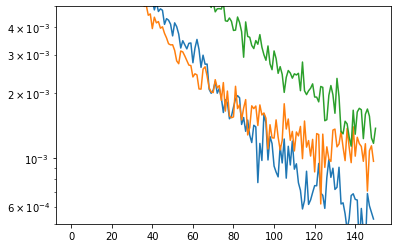

In [6]:
plt.figure()
for i, energy in enumerate(energies):
    plt.plot(energy[:, -1] + 1.0638, label=versions[i])
    av_energy = energy[-25:, -1].mean()
    print(av_energy)
plt.ylim([5e-4, 5e-3])
plt.yscale('log')
plt.show()